# MiniProject_1_Powerlifting


Data
https://drive.google.com/drive/folders/1y4SfAgiNPYOcuEbYYhnJwHUuzex2zKDK
Statistics
Get the statistics on the data set that needs to be answered before answering actual questions:
# rows are there with Age is nan.
# individuals are there with Age is nan.
# individuals with Sex "M" with Age is nan.
# individuals with Sex "F" with Age is nan.
Mean age of individuals with Sex "M"
Mean age of individuals with Sex "F"
Questions
1. Top 10 states for Men.
2. Top 10 states for Women.
3. Plot pie chart and bar chart for Men Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)
4. Plot pie chart and bar chart for Women Top 21-30 states (inclusive).
   (Plot one with Matplotlib and one with Seaborn)
5. Top 10 states for Men in year 2021
   (Hint: Use Custom Function)
6. Top 10 states for Women in year 2021
   (Hint: Use Custom Function)
7. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60
   (Hint: Use Custom Function or pandas pd.cut)
8. Pie chart for men w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)
9. Pie chart for women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)
10. Histogram for men by age (use Age for binning purpose)
11. Histogram for women by age (use Age for binning purpose)



In [1]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [5]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")
df

<ipython-input-5-63159dfe95d1>:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/Copy of openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


In [6]:
import pandas as pd
from tabulate import tabulate
df_state_men = df.loc[df["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1 = df_state_men.sort_values(by="count",ascending=False)
print("Top 10 states for Men")
print(tabulate(df1.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  13 | CA      |   32456 |
| 114 | TX      |   23517 |
|  81 | OH      |   11486 |
|  28 | FL      |   11341 |
|  85 | PA      |   10857 |
|  63 | NC      |   10510 |
|  80 | NY      |    9523 |
| 116 | VA      |    9312 |
|  83 | ON      |    9052 |
|   7 | AZ      |    7632 |
+-----+---------+---------+


In [10]:
df_state_women = df.loc[df["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2 = df_state_women.sort_values(by="count",ascending=False)
print("Top 10 states for Women")
print(tabulate(df2.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Women
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  12 | CA      |   14639 |
| 101 | TX      |   11432 |
|  25 | FL      |    5199 |
| 109 | WI      |    4396 |
| 107 | WA      |    4256 |
|  71 | NY      |    4168 |
|  72 | OH      |    4110 |
|  76 | PA      |    4003 |
| 103 | VA      |    3781 |
|  57 | NC      |    3744 |
+-----+---------+---------+


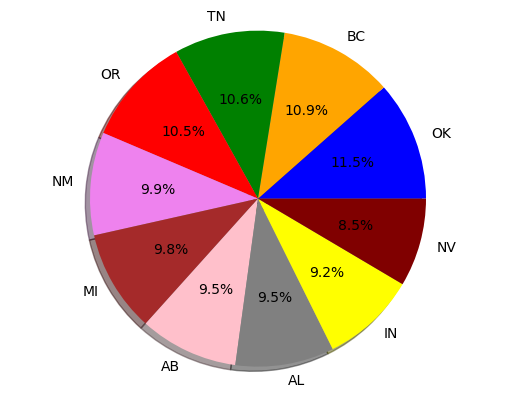

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

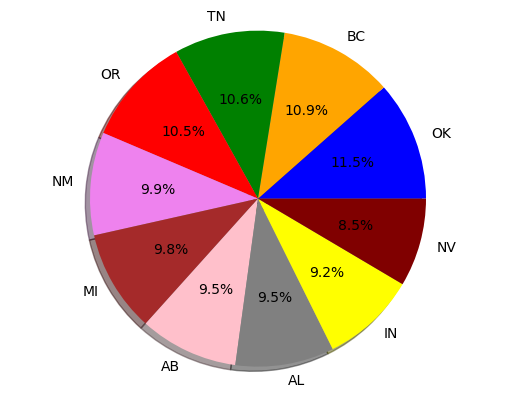

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

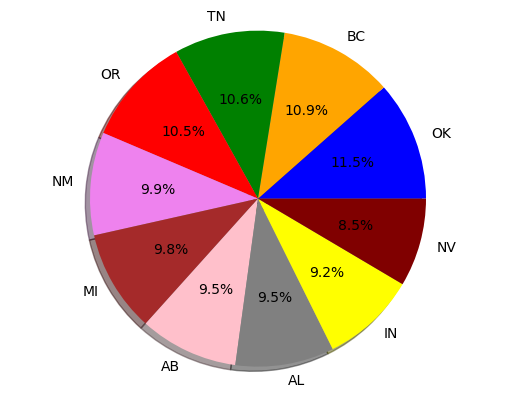

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

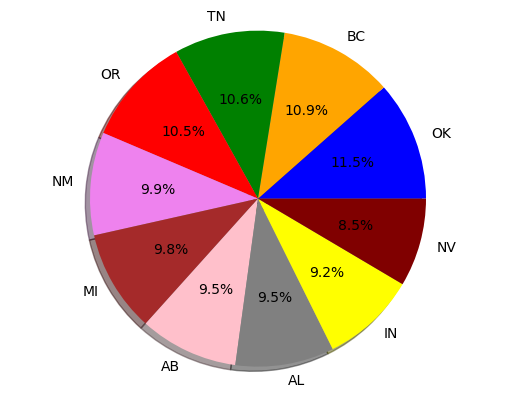

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

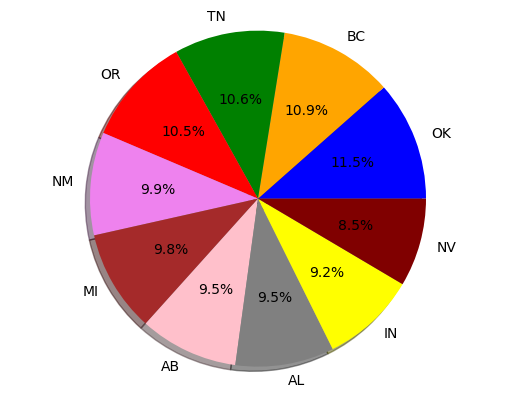

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

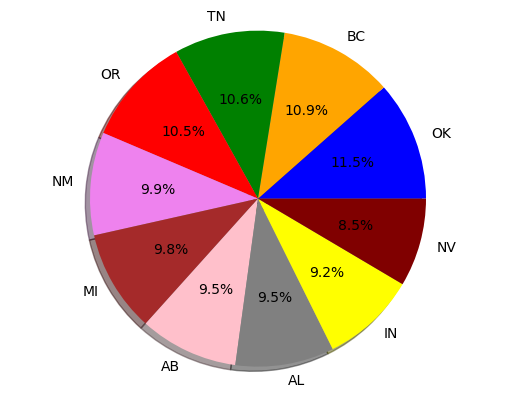

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

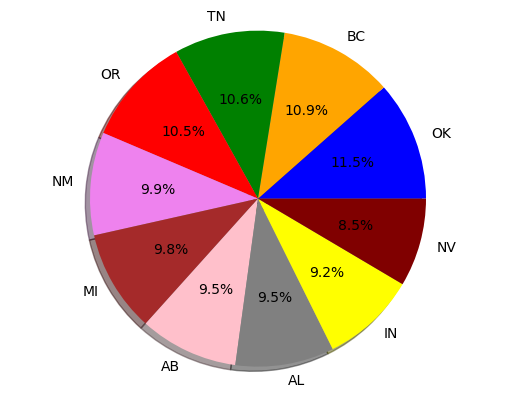

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

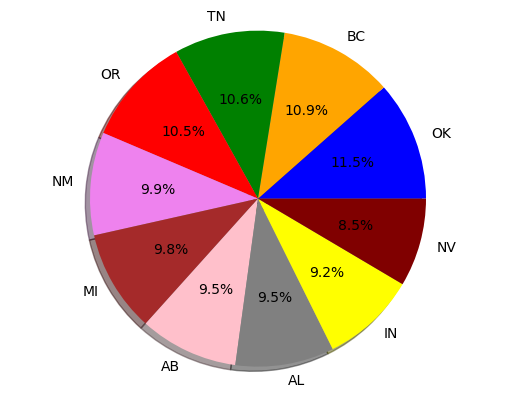

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

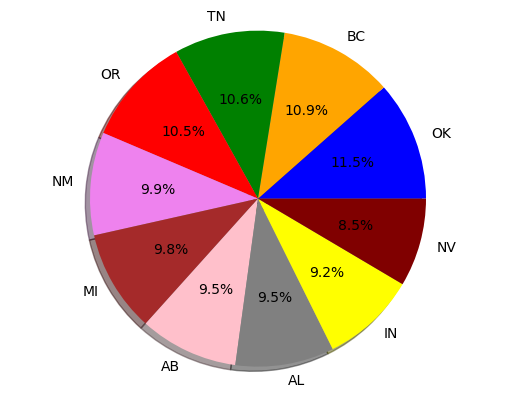

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

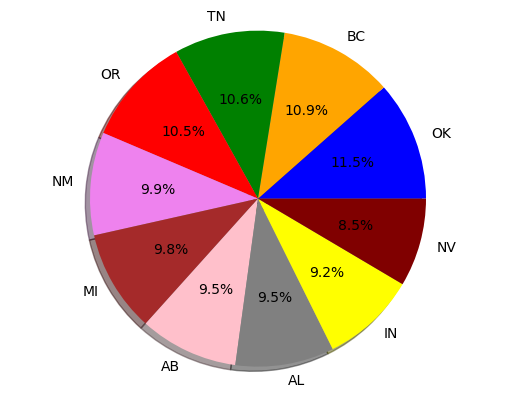

In [ ]:
import matplotlib.pyplot as plt

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

colors = ["blue", "orange", "green", "red", "violet",
          "brown", "pink", "grey", "yellow", "maroon"]

plt.pie(list(data.values()), labels=data.keys(), colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=0) #here the starting angle is the origin "0"

plt.axis("equal")
plt.show()

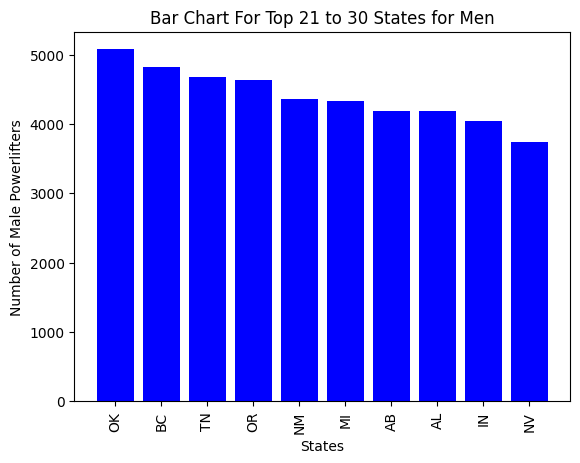

In [ ]:
import matplotlib.pyplot as plt # make sure to import matplotlib.pyplot

data = {"OK": 5075, "BC": 4823, "TN": 4680, "OR": 4632, "NM": 4364,
        "MI": 4330, "AB": 4184, "AL": 4184, "IN": 4036, "NV": 3746}

plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=90)
plt.show()


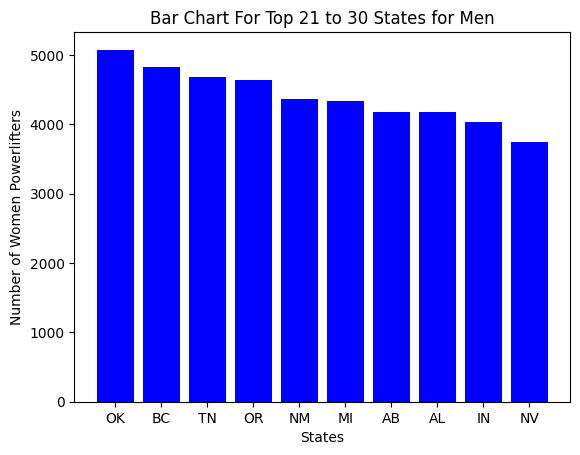

In [ ]:
plt.bar(data.keys(), data.values(), color="blue")
plt.xlabel("States")
plt.ylabel("Number of Women Powerlifters")
plt.title("Bar Chart For Top 21 to 30 States for Men")
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/openpowerlifting-2021-12-10-b420db66.csv") # Make sure file path is correct
df

Mounted at /content/drive


<ipython-input-10-f142c8a2cc86>:6: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/openpowerlifting-2021-12-10-b420db66.csv") # Make sure file path is correct


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569941,Inna Orobets,F,SBD,Single-ply,45.0,45-49,40-49,Open,109.30,84+,...,Yes,Ukraine,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569942,Ágnes Szabó,F,SBD,Single-ply,27.5,24-34,24-39,Open,113.22,84+,...,Yes,Hungary,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569943,Brenda van der Meulen,F,SBD,Single-ply,37.5,35-39,24-39,Open,110.79,84+,...,Yes,Netherlands,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships
2569944,Kelly Phasey,F,SBD,Single-ply,39.5,35-39,40-49,Open,124.53,84+,...,Yes,England,NaN,IPF,IPF,2016-11-14,USA,NaN,Orlando,World Open Championships


<ipython-input-11-7276f639c291>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)


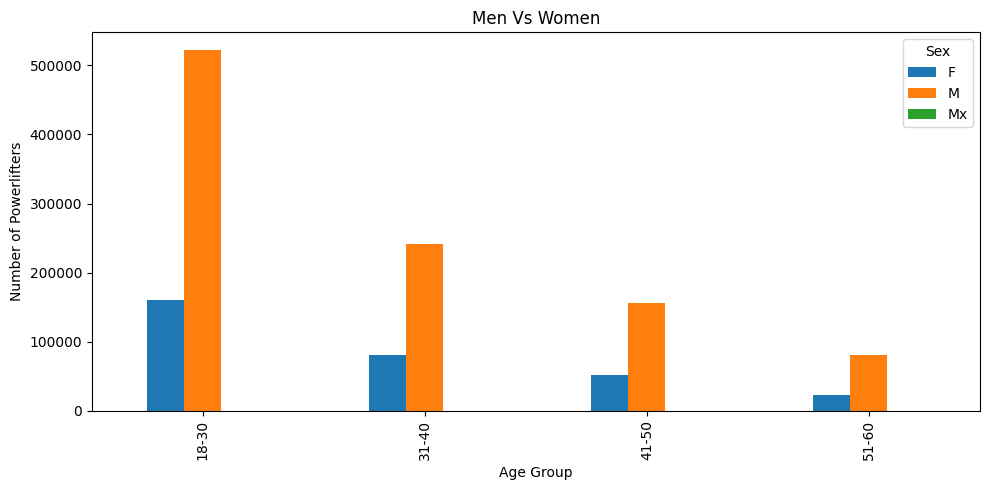

In [ ]:
import pandas as pd # import the pandas library

# Create age groups
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by age group and sex
age_sex_counts = df.groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)

# Plot bar chart
age_sex_counts.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Powerlifters')
plt.title('Men Vs Women')
plt.legend(title='Sex')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
!pip install tabulate # Install the tabulate module

import pandas as pd # import the pandas library
from tabulate import tabulate # import the tabulate function from the tabulate module

df_2021 = df[df['Date'].str.contains('2021')]
df_state_men_2021 = df_2021.loc[df_2021["Sex"]=="M"].groupby(["State"]).size().to_frame("count").reset_index()
df1_2021 = df_state_men_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Men in 2021")
print(tabulate(df1_2021.head(10), headers='keys', tablefmt='psql'))

#Top 10 state for Women in 2021
df_state_women_2021 = df_2021.loc[df_2021["Sex"]=="F"].groupby(["State"]).size().to_frame("count").reset_index()
df2_2021 = df_state_women_2021.sort_values(by="count",ascending=False)
print("Top 10 states for Women in 2021")
print(tabulate(df2_2021.head(10), headers='keys', tablefmt='psql'))

Top 10 states for Men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    3384 |
| 70 | TX      |    3037 |
| 16 | FL      |    1781 |
| 51 | OH      |    1529 |
| 55 | PA      |    1183 |
| 72 | VA      |    1156 |
| 38 | NC      |    1109 |
| 50 | NY      |    1033 |
| 17 | GA      |     935 |
| 34 | MO      |     893 |
+----+---------+---------+
Top 10 states for Women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  7 | CA      |    1578 |
| 63 | TX      |    1572 |
| 13 | FL      |     921 |
| 47 | OH      |     680 |
| 35 | NC      |     635 |
| 65 | VA      |     542 |
| 46 | NY      |     530 |
| 51 | PA      |     502 |
| 29 | MI      |     478 |
| 24 | LA      |     473 |
+----+---------+---------+


<ipython-input-17-588b17190b3f>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_counts_women = df_women.groupby('AgeGroup').size()


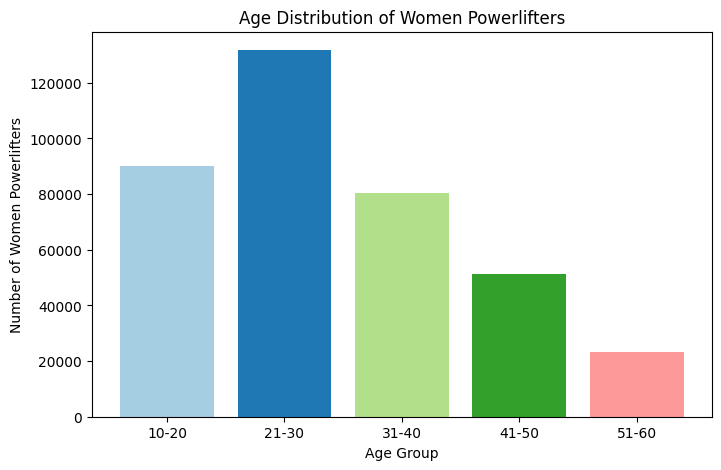

In [ ]:

#Bar chart for the women w.r.t age group
# Create age groups
bins = [10, 20, 30, 40, 50, 60]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Filtering the DataFrame for Women only
df_women = df[df['Sex'] == 'F']

# Group by age group and sum the counts
age_counts_women = df_women.groupby('AgeGroup').size()

# Plot bar chart for women
plt.figure(figsize=(8, 5))
plt.bar(age_counts_women.index, age_counts_women.values, color=plt.cm.Paired.colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Women Powerlifters')
plt.title('Age Distribution of Women Powerlifters')
plt.xticks(rotation=0)
plt.show()